In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('ppi.csv')

# Step 2: Preprocess the data
# numerical features
df_cleaned = df.dropna()  
df_num = df[df.columns[6:]]

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

# Step 4: Apply PCA
pca = PCA(n_components=12)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Step 5: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components,columns=[f'PC{i}'for i in range(1,13)])

In [5]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(65150, 2)

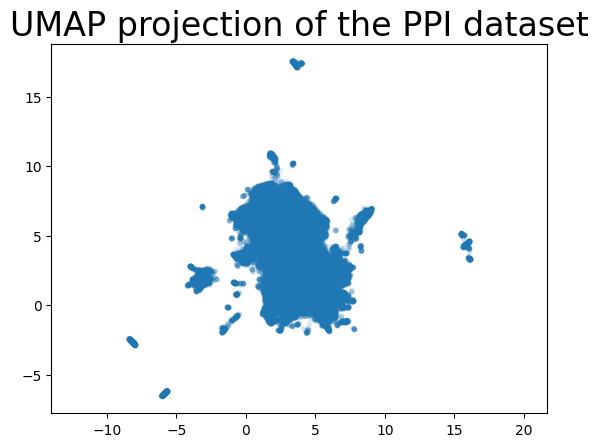

In [10]:

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    marker=".",
    alpha=.1
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the PPI dataset', fontsize=24);

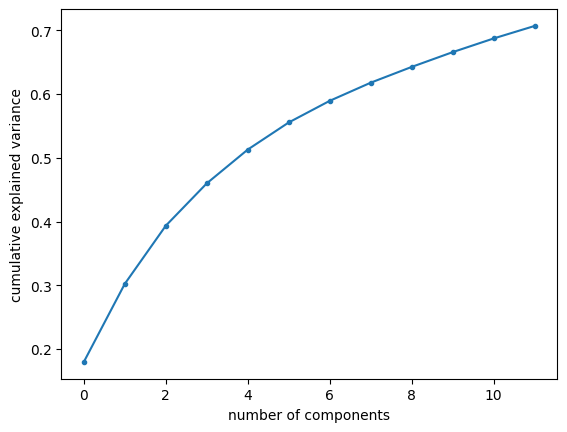

In [19]:

plt.plot(np.cumsum(pca.explained_variance_ratio_),marker=".")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

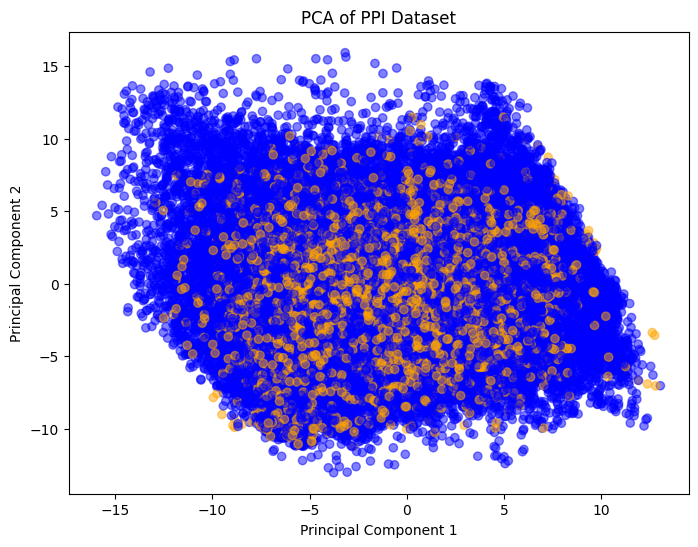

In [ ]:


condition = df_num['p_interface'] == 1  # This condition is for rows where target_column equals 1
colors = ['orange' if cond else 'blue' for cond in condition]

# Step 6: Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5,c=colors)
plt.title('PCA of PPI Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()